<a href="https://colab.research.google.com/github/jovo999/football-2023/blob/main/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [2]:
df = pd.read_csv('football.csv' , encoding='windows-1256' , sep=';')
df.head()

Rk             Player Nation   Pos         Squad            Comp  Age  \
0   1   Brenden Aaronson    USA  MFFW  Leeds United  Premier League   22   
1   2   Yunis Abdelhamid    MAR    DF         Reims         Ligue 1   35   
2   3      Himad Abdelli    FRA  MFFW        Angers         Ligue 1   23   
3   4  Salis Abdul Samed    GHA    MF          Lens         Ligue 1   22   
4   5    Laurent Abergel    FRA    MF       Lorient         Ligue 1   30   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  20      19  ...  0.17  2.54  0.51    0.0    0.0  0.00   4.86    0.34   
1  1987  22      22  ...  0.05  0.18  1.59    0.0    0.0  0.00   6.64    2.18   
2  1999  14       8  ...  0.00  1.05  1.40    0.0    0.0  0.00   8.14    0.93   
3  2000  20      20  ...  0.00  0.35  0.80    0.0    0.0  0.05   6.60    0.50   
4  1993  15      15  ...  0.00  0.23  2.02    0.0    0.0  0.00   6.51    0.31   

   AerLost  AerWon%  
0     1.19     22.2  
1     1.23     64.0  
2     1.05     47.1  
3     0.50     50.0  
4     0.39     44.4  

[5 rows x 124 columns]

In [3]:
df.shape

(2689, 124)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


In [5]:
df.isnull().sum()

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 124, dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

Rk          Age         Born           MP       Starts  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000   
mean   1345.000000    26.011157  1996.155820    11.833023     8.476013   
std     776.391761     4.446259     4.450108     6.864278     6.994383   
min       1.000000    15.000000  1981.000000     1.000000     0.000000   
25%     673.000000    23.000000  1993.000000     5.000000     2.000000   
50%    1345.000000    26.000000  1996.000000    13.000000     7.000000   
75%    2017.000000    29.000000  2000.000000    18.000000    14.000000   
max    2689.000000    41.000000  2007.000000    23.000000    23.000000   

               Min          90s        Goals        Shots          SoT  ...  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000  ...   
mean    760.451097     8.450465     1.027520     1.245787     0.411261  ...   
std     591.094260     6.567484     2.013714     1.424619     0.754716  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     194.000000     2.200000     0.000000     0.260000     0.000000  ...   
50%     684.000000     7.600000     0.000000     0.860000     0.180000  ...   
75%    1245.000000    13.800000     1.000000     1.850000     0.590000  ...   
max    2070.000000    23.000000    25.000000    15.000000    10.000000  ...   

               Off          Crs         TklW        PKwon        PKcon  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000   
mean      0.204697     1.661636     0.990569     0.009249     0.015173   
std       0.552376     2.319000     1.235965     0.043781     0.077399   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.300000     0.000000     0.000000   
50%       0.000000     0.760000     0.830000     0.000000     0.000000   
75%       0.210000     2.500000     1.320000     0.000000     0.000000   
max      10.000000    30.000000    20.000000     0.870000     2.000000   

                OG        Recov       AerWon      AerLost      AerWon%  
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000  
mean      0.003142     4.951967     1.312064     1.497356    43.583600  
std       0.022607     2.901833     1.579539     1.830391    26.673092  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     3.330000     0.330000     0.550000    27.600000  
50%       0.000000     5.000000     0.930000     1.100000    46.400000  
75%       0.000000     6.270000     1.790000     1.830000    60.000000  
max       0.500000    30.000000    25.000000    30.000000   100.000000  

[8 rows x 119 columns]

In [8]:
pd.set_option('display.expand_frame_repr' , False)

In [9]:
pd.set_option('display.max_columns' , None)

In [10]:
df

Rk             Player Nation   Pos          Squad            Comp  Age  Born  MP  Starts   Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist  ShoFK  ShoPK  PKatt  PasTotCmp  PasTotAtt  PasTotCmp%  PasTotDist  PasTotPrgDist  PasShoCmp  PasShoAtt  PasShoCmp%  PasMedCmp  PasMedAtt  PasMedCmp%  PasLonCmp  PasLonAtt  PasLonCmp%  Assists  PasAss  Pas3rd   PPA  CrsPA  PasProg  PasAtt  PasLive  PasDead  PasFK    TB    Sw  PasCrs    TI    CK  CkIn  CkOut  CkStr  PasCmp  PasOff  PasBlocks   SCA  ScaPassLive  ScaPassDead  ScaDrib  ScaSh  ScaFld  ScaDef   GCA  GcaPassLive  GcaPassDead  GcaDrib  GcaSh  GcaFld  GcaDef   Tkl  TklWon  TklDef3rd  TklMid3rd  TklAtt3rd  TklDri  TklDriAtt  TklDri%  TklDriPast  Blocks  BlkSh  BlkPass    Int  Tkl+Int   Clr   Err  Touches  TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  TouLive  ToAtt  ToSuc  ToSuc%  ToTkl  ToTkl%  Carries  CarTotDist  CarPrgDist  CarProg  Car3rd   CPA  CarMis  CarDis   Rec  RecProg  CrdY  CrdR  2CrdY   Fls   Fld   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  AerLost  AerWon%
0        1   Brenden Aaronson    USA  MFFW   Leeds United  Premier League   22  2000  20      19  1596  17.7      1   1.53  0.28  18.5  0.04   0.20     19.0   0.11    0.0    0.0       23.2       31.0        74.9       293.0           85.7       13.3       16.2        81.9       5.93       7.74        76.6       0.90       2.37        38.1     0.11    1.75    1.75  0.45   0.11     3.22    31.0     28.1     2.88   0.96  0.17  0.00    2.54  0.23  1.47  0.68   0.62   0.06    23.2    0.00       0.85  3.62         2.37         0.56     0.23   0.11    0.28    0.06  0.28         0.17          0.0      0.0   0.06     0.0    0.06  1.64    0.51       0.45       0.90       0.28    0.51       1.47     34.6        0.96    1.69   0.11     1.58   0.06     1.69  0.28  0.06     44.0       0.40       4.35       19.0      21.50       2.49     44.0   3.73   1.19    31.8   1.75    47.0     26.7       136.1        56.6     1.53    1.07  0.40    2.60    3.11  30.2     5.65  0.11   0.0    0.0  0.62  2.26  0.17  2.54  0.51    0.0    0.0  0.00   4.86    0.34     1.19     22.2
1        2   Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   35  1987  22      22  1980  22.0      0   0.86  0.05   5.3  0.00   0.00     13.5   0.00    0.0    0.0       38.5       47.2        81.5       751.5          318.5       10.9       12.9        84.5      23.20      25.70        90.1       3.77       7.00        53.9     0.05    0.27    2.91  0.09   0.00     4.50    47.2     43.3     3.73   3.32  0.00  0.55    0.18  0.09  0.00  0.00   0.00   0.00    38.5    0.23       0.59  1.14         0.86         0.00     0.00   0.18    0.00    0.09  0.18         0.14          0.0      0.0   0.05     0.0    0.00  2.50    1.59       1.45       1.00       0.05    1.32       1.68     78.4        0.36    2.23   0.77     1.45   2.00     4.50  2.91  0.05     59.2       6.23      27.50       29.5       2.73       1.09     59.2   0.68   0.32    46.7   0.36    53.3     40.0       234.2       125.0     0.55    0.23  0.09    0.73    0.68  34.5     0.23  0.09   0.0    0.0  1.32  0.50  0.05  0.18  1.59    0.0    0.0  0.00   6.64    2.18     1.23     64.0
2        3      Himad Abdelli    FRA  MFFW         Angers         Ligue 1   23  1999  14       8   770   8.6      0   1.05  0.35  33.3  0.00   0.00     19.2   0.00    0.0    0.0       40.0       49.5        80.8       676.0          188.1       18.5       22.0        84.1      15.50      18.70        82.6       4.42       5.93        74.5     0.00    1.51    3.95  1.74   0.35     6.40    49.5     48.1     1.16   0.35  0.12  0.23    1.05  0.81  0.00  0.00   0.00   0.00    40.0    0.23       1.16  2.67         2.44         0.00     0.00   0.12    0.00    0.12  0.00         0.00          0.0      0.0   0.00     0.0    0.00  2.91    1.40       1.28       1.40       0.23    1.63       2.67     60.9        1.05    1.51   0.12     1.40   0.93     3.84  0.93  0.00     62.6       0.93      11.40       36.0  

In [11]:
df.drop(['90s' ,'SoT' , 'SoT%' , 'G/Sh' , 'G/SoT' , 'ShoFK' , 'ShoPK' , 'PKatt' ,'PasTotCmp' , 'PasTotAtt', 'PasTotCmp%', 'PasTotDist' , 'PasTotPrgDist', ] , axis=1 , inplace=True)

In [12]:
df.tail()

Rk            Player Nation   Pos          Squad            Comp  Age  Born  MP  Starts   Min  Goals  Shots  ShoDist  PasShoCmp  PasShoAtt  PasShoCmp%  PasMedCmp  PasMedAtt  PasMedCmp%  PasLonCmp  PasLonAtt  PasLonCmp%  Assists  PasAss  Pas3rd   PPA  CrsPA  PasProg  PasAtt  PasLive  PasDead  PasFK    TB    Sw  PasCrs    TI    CK  CkIn  CkOut  CkStr  PasCmp  PasOff  PasBlocks   SCA  ScaPassLive  ScaPassDead  ScaDrib  ScaSh  ScaFld  ScaDef   GCA  GcaPassLive  GcaPassDead  GcaDrib  GcaSh  GcaFld  GcaDef   Tkl  TklWon  TklDef3rd  TklMid3rd  TklAtt3rd  TklDri  TklDriAtt  TklDri%  TklDriPast  Blocks  BlkSh  BlkPass    Int  Tkl+Int   Clr  Err  Touches  TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  TouLive  ToAtt  ToSuc  ToSuc%  ToTkl  ToTkl%  Carries  CarTotDist  CarPrgDist  CarProg  Car3rd   CPA  CarMis  CarDis   Rec  RecProg  CrdY  CrdR  2CrdY   Fls   Fld   Off   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%
2684  2685  Szymon ?urkowski    POL    MF     Fiorentina         Serie A   25  1997   2       0    32      0   5.00     15.2       15.0       17.5        85.7      17.50      17.50       100.0       5.00       5.00       100.0     2.50    2.50    2.50  2.50   0.00     2.50    47.5     47.5     0.00   0.00  0.00  0.00    2.50  0.00  0.00  0.00   0.00   0.00    42.5    0.00       2.50  5.00         5.00         0.00     0.00   0.00    0.00    0.00  2.50         2.50          0.0      0.0   0.00     0.0     0.0  0.00    0.00       0.00       0.00       0.00    0.00       0.00      0.0        0.00    0.00   0.00     0.00   0.00     0.00  0.00  0.0     62.5       0.00       2.50       20.0       40.0       7.50     62.5   2.50   0.00     0.0   2.50   100.0     40.0       287.5       150.0     7.50    2.50  2.50    2.50    2.50  45.0    10.00  0.00   0.0    0.0  2.50  0.00  0.00  2.50  0.00    0.0    0.0  0.0   5.00    2.50     2.50     50.0
2685  2686  Szymon ?urkowski    POL    MF         Spezia         Serie A   25  1997   1       0     8      0   0.00      0.0       20.0       30.0        66.7       0.00       0.00         0.0       0.00      10.00         0.0     0.00    0.00    0.00  0.00   0.00     0.00    40.0     40.0     0.00   0.00  0.00  0.00    0.00  0.00  0.00  0.00   0.00   0.00    20.0    0.00       0.00  0.00         0.00         0.00     0.00   0.00    0.00    0.00  0.00         0.00          0.0      0.0   0.00     0.0     0.0  0.00    0.00       0.00       0.00       0.00    0.00       0.00      0.0        0.00    0.00   0.00     0.00  10.00    10.00  0.00  0.0     80.0      20.00      20.00       30.0       30.0       0.00     80.0  20.00  10.00    50.0  10.00    50.0     30.0       340.0       240.0    10.00    0.00  0.00   10.00    0.00  10.0    10.00  0.00   0.0    0.0  0.00  0.00  0.00  0.00  0.00    0.0    0.0  0.0  30.00    0.00     0.00      0.0
2686  2687   Martin طdegaard    NOR    MF        Arsenal  Premier League   24  1998  20      20  1684      8   2.73     18.9       19.7       22.5        87.4      13.50      17.00        79.8       3.21       4.97        64.5     0.27    2.30    3.53  2.51   0.11     7.54    48.4     44.7     3.53   2.62  0.80  0.21    2.51  0.32  0.59  0.21   0.21   0.05    38.3    0.16       1.23  5.08         3.53         0.70     0.11   0.48    0.16    0.11  0.64         0.53          0.0      0.0   0.11     0.0     0.0  1.02    0.70       0.37       0.48       0.16    0.21       0.91     23.5        0.70    0.48   0.11     0.37   0.16     1.18  0.37  0.0     56.8       0.86       5.61       23.7       28.2       4.06     56.8   2.25   1.28    57.1   0.80    35.7     33.0       183.0        83.9     2.78    1.71  0.96    1.23    1.50  40.5     5.08  0.16   0.0    0.0  1.02  0.80  0.05  2.51  0.70    0.0    0.0  0.0   5.19    0.48     0.70     40.9
2687  2688       Milan ?uri?    BIH    FW  Hellas Verona         Serie A   32  1990  16       7   703      1   1.03     11.0       13.6       23.7        57.3       4.10       8.59        47.8       0.38     

In [13]:
df['Player'] = df['Player'].apply(lambda name:'unknown' if '?' in str(name) else name)
df['Player'] = df['Player'].str.replace(r'[\u0600-\u06FF]','', regex=True)

In [14]:
df.tail()

Rk          Player Nation   Pos          Squad            Comp  Age  Born  MP  Starts   Min  Goals  Shots  ShoDist  PasShoCmp  PasShoAtt  PasShoCmp%  PasMedCmp  PasMedAtt  PasMedCmp%  PasLonCmp  PasLonAtt  PasLonCmp%  Assists  PasAss  Pas3rd   PPA  CrsPA  PasProg  PasAtt  PasLive  PasDead  PasFK    TB    Sw  PasCrs    TI    CK  CkIn  CkOut  CkStr  PasCmp  PasOff  PasBlocks   SCA  ScaPassLive  ScaPassDead  ScaDrib  ScaSh  ScaFld  ScaDef   GCA  GcaPassLive  GcaPassDead  GcaDrib  GcaSh  GcaFld  GcaDef   Tkl  TklWon  TklDef3rd  TklMid3rd  TklAtt3rd  TklDri  TklDriAtt  TklDri%  TklDriPast  Blocks  BlkSh  BlkPass    Int  Tkl+Int   Clr  Err  Touches  TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  TouLive  ToAtt  ToSuc  ToSuc%  ToTkl  ToTkl%  Carries  CarTotDist  CarPrgDist  CarProg  Car3rd   CPA  CarMis  CarDis   Rec  RecProg  CrdY  CrdR  2CrdY   Fls   Fld   Off   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%
2684  2685         unknown    POL    MF     Fiorentina         Serie A   25  1997   2       0    32      0   5.00     15.2       15.0       17.5        85.7      17.50      17.50       100.0       5.00       5.00       100.0     2.50    2.50    2.50  2.50   0.00     2.50    47.5     47.5     0.00   0.00  0.00  0.00    2.50  0.00  0.00  0.00   0.00   0.00    42.5    0.00       2.50  5.00         5.00         0.00     0.00   0.00    0.00    0.00  2.50         2.50          0.0      0.0   0.00     0.0     0.0  0.00    0.00       0.00       0.00       0.00    0.00       0.00      0.0        0.00    0.00   0.00     0.00   0.00     0.00  0.00  0.0     62.5       0.00       2.50       20.0       40.0       7.50     62.5   2.50   0.00     0.0   2.50   100.0     40.0       287.5       150.0     7.50    2.50  2.50    2.50    2.50  45.0    10.00  0.00   0.0    0.0  2.50  0.00  0.00  2.50  0.00    0.0    0.0  0.0   5.00    2.50     2.50     50.0
2685  2686         unknown    POL    MF         Spezia         Serie A   25  1997   1       0     8      0   0.00      0.0       20.0       30.0        66.7       0.00       0.00         0.0       0.00      10.00         0.0     0.00    0.00    0.00  0.00   0.00     0.00    40.0     40.0     0.00   0.00  0.00  0.00    0.00  0.00  0.00  0.00   0.00   0.00    20.0    0.00       0.00  0.00         0.00         0.00     0.00   0.00    0.00    0.00  0.00         0.00          0.0      0.0   0.00     0.0     0.0  0.00    0.00       0.00       0.00       0.00    0.00       0.00      0.0        0.00    0.00   0.00     0.00  10.00    10.00  0.00  0.0     80.0      20.00      20.00       30.0       30.0       0.00     80.0  20.00  10.00    50.0  10.00    50.0     30.0       340.0       240.0    10.00    0.00  0.00   10.00    0.00  10.0    10.00  0.00   0.0    0.0  0.00  0.00  0.00  0.00  0.00    0.0    0.0  0.0  30.00    0.00     0.00      0.0
2686  2687  Martin degaard    NOR    MF        Arsenal  Premier League   24  1998  20      20  1684      8   2.73     18.9       19.7       22.5        87.4      13.50      17.00        79.8       3.21       4.97        64.5     0.27    2.30    3.53  2.51   0.11     7.54    48.4     44.7     3.53   2.62  0.80  0.21    2.51  0.32  0.59  0.21   0.21   0.05    38.3    0.16       1.23  5.08         3.53         0.70     0.11   0.48    0.16    0.11  0.64         0.53          0.0      0.0   0.11     0.0     0.0  1.02    0.70       0.37       0.48       0.16    0.21       0.91     23.5        0.70    0.48   0.11     0.37   0.16     1.18  0.37  0.0     56.8       0.86       5.61       23.7       28.2       4.06     56.8   2.25   1.28    57.1   0.80    35.7     33.0       183.0        83.9     2.78    1.71  0.96    1.23    1.50  40.5     5.08  0.16   0.0    0.0  1.02  0.80  0.05  2.51  0.70    0.0    0.0  0.0   5.19    0.48     0.70     40.9
2687  2688         unknown    BIH    FW  Hellas Verona         Serie A   32  1990  16       7   703      1   1.03     11.0       13.6       23.7        57.3       4.10       8.59        47.8       0.38       0.64    

In [15]:
df['Comp'].value_counts()

Comp
Ligue 1           565
La Liga           550
Serie A           544
Premier League    540
Bundesliga        490
Name: count, dtype: int64

In [16]:
df['Pos'].value_counts()

Pos
DF      825
MF      608
FW      409
FWMF    244
MFFW    208
GK      164
DFMF    101
MFDF     62
DFFW     38
FWDF     30
Name: count, dtype: int64

In [17]:
df['Pos'] = df['Pos'].str.replace('DF' , 'CB')
df['Pos'] = df['Pos'].str.replace('MF' , 'CAM')
df['Pos'] = df['Pos'].str.replace('FW' , 'LW')
df['Pos'] = df['Pos'].str.replace('DFMF' , 'CDM')
df['Pos'] = df['Pos'].str.replace('MFDF' , 'CM')
df['Pos'] = df['Pos'].str.replace('FWDF' , 'ST')
df['Pos'] = df['Pos'].str.replace('LWCB' , 'LM')
df['Pos'] = df['Pos'].str.replace('CBLW' , 'LB')
df['Pos'] = df['Pos'].str.replace('CAMCB' , 'CF')
df['Pos'] = df['Pos'].str.replace('CBCAM' , 'CDM')

In [18]:
df['Pos'].value_counts()

Pos
CB       825
CAM      608
LW       409
LWCAM    244
CAMLW    208
GK       164
CDM      101
CF        62
LB        38
LM        30
Name: count, dtype: int64

In [19]:
def young_player(age):
  if age['Age'] <= 20:
    return age['Squad']
  else:
    return None

In [20]:
df['young_player'] = df.apply(young_player , axis=1)

In [21]:
most_common_club = df['young_player'].value_counts().idxmax()
df

Rk             Player Nation    Pos          Squad            Comp  Age  Born  MP  Starts   Min  Goals  Shots  ShoDist  PasShoCmp  PasShoAtt  PasShoCmp%  PasMedCmp  PasMedAtt  PasMedCmp%  PasLonCmp  PasLonAtt  PasLonCmp%  Assists  PasAss  Pas3rd   PPA  CrsPA  PasProg  PasAtt  PasLive  PasDead  PasFK    TB    Sw  PasCrs    TI    CK  CkIn  CkOut  CkStr  PasCmp  PasOff  PasBlocks   SCA  ScaPassLive  ScaPassDead  ScaDrib  ScaSh  ScaFld  ScaDef   GCA  GcaPassLive  GcaPassDead  GcaDrib  GcaSh  GcaFld  GcaDef   Tkl  TklWon  TklDef3rd  TklMid3rd  TklAtt3rd  TklDri  TklDriAtt  TklDri%  TklDriPast  Blocks  BlkSh  BlkPass    Int  Tkl+Int   Clr   Err  Touches  TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  TouLive  ToAtt  ToSuc  ToSuc%  ToTkl  ToTkl%  Carries  CarTotDist  CarPrgDist  CarProg  Car3rd   CPA  CarMis  CarDis   Rec  RecProg  CrdY  CrdR  2CrdY   Fls   Fld   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  AerLost  AerWon% young_player
0        1   Brenden Aaronson    USA  CAMLW   Leeds United  Premier League   22  2000  20      19  1596      1   1.53     19.0       13.3       16.2        81.9       5.93       7.74        76.6       0.90       2.37        38.1     0.11    1.75    1.75  0.45   0.11     3.22    31.0     28.1     2.88   0.96  0.17  0.00    2.54  0.23  1.47  0.68   0.62   0.06    23.2    0.00       0.85  3.62         2.37         0.56     0.23   0.11    0.28    0.06  0.28         0.17          0.0      0.0   0.06     0.0    0.06  1.64    0.51       0.45       0.90       0.28    0.51       1.47     34.6        0.96    1.69   0.11     1.58   0.06     1.69  0.28  0.06     44.0       0.40       4.35       19.0      21.50       2.49     44.0   3.73   1.19    31.8   1.75    47.0     26.7       136.1        56.6     1.53    1.07  0.40    2.60    3.11  30.2     5.65  0.11   0.0    0.0  0.62  2.26  0.17  2.54  0.51    0.0    0.0  0.00   4.86    0.34     1.19     22.2         None
1        2   Yunis Abdelhamid    MAR     CB          Reims         Ligue 1   35  1987  22      22  1980      0   0.86     13.5       10.9       12.9        84.5      23.20      25.70        90.1       3.77       7.00        53.9     0.05    0.27    2.91  0.09   0.00     4.50    47.2     43.3     3.73   3.32  0.00  0.55    0.18  0.09  0.00  0.00   0.00   0.00    38.5    0.23       0.59  1.14         0.86         0.00     0.00   0.18    0.00    0.09  0.18         0.14          0.0      0.0   0.05     0.0    0.00  2.50    1.59       1.45       1.00       0.05    1.32       1.68     78.4        0.36    2.23   0.77     1.45   2.00     4.50  2.91  0.05     59.2       6.23      27.50       29.5       2.73       1.09     59.2   0.68   0.32    46.7   0.36    53.3     40.0       234.2       125.0     0.55    0.23  0.09    0.73    0.68  34.5     0.23  0.09   0.0    0.0  1.32  0.50  0.05  0.18  1.59    0.0    0.0  0.00   6.64    2.18     1.23     64.0         None
2        3      Himad Abdelli    FRA  CAMLW         Angers         Ligue 1   23  1999  14       8   770      0   1.05     19.2       18.5       22.0        84.1      15.50      18.70        82.6       4.42       5.93        74.5     0.00    1.51    3.95  1.74   0.35     6.40    49.5     48.1     1.16   0.35  0.12  0.23    1.05  0.81  0.00  0.00   0.00   0.00    40.0    0.23       1.16  2.67         2.44         0.00     0.00   0.12    0.00    0.12  0.00         0.00          0.0      0.0   0.00     0.0    0.00  2.91    1.40       1.28       1.40       0.23    1.63       2.67     60.9        1.05    1.51   0.12     1.40   0.93     3.84  0.93  0.00     62.6       0.93      11.40       36.0      17.40       1.16     62.6   3.84   2.09    54.5   1.51    39.4     48.5       298.5       151.0     2.56    2.56  0.47    2.09    1.05  43.4     5.93  0.12   0.0    0.0  1.74  1.28  0.00  1.05  1.40    0.0    0.0  0.00   8.14    0.93     1.05     47.1         None
3        4  Salis Abdul Samed    GHA    CAM           Lens         Ligue 1   22  2000  20      20  1799      1   0.60     20.3       29.6   

In [22]:
vr1 = df.groupby('Player')['Shots'].sum()
vr1

Player
Aarn Martn           0.82
Aaron Cresswell      0.41
Aaron Hickey         0.49
Aaron Ramsdale       0.00
Aaron Ramsey         1.50
                    ...  
scar Trejo           0.67
scar Valentn         0.66
scar de Marcos       0.06
tienne Capoue        1.08
unknown            144.94
Name: Shots, Length: 2431, dtype: float64

In [23]:
def top_comp(df , goals_col = 'goals' , league_col ='Comp' , top_n=5):
  league_col = df.groupby(league_col)[goals_col].sum().sort_values(ascending=False)
  return goals_col.sort_values(ascending=False).head(top_n)


In [24]:
df['Nation'].value_counts()

Nation
ESP    370
FRA    365
GER    230
ITA    206
ENG    184
      ... 
LVA      1
DOM      1
RSA      1
BDI      1
GUF      1
Name: count, Length: 104, dtype: int64

In [25]:
def top_plyar(df):
  forward = df[df['Pos'] == 'CF']
  return forward[['Player' , 'Goals']]


print(top_plyar(df))

                    Player  Goals
45       Maghnes Akliouche      0
126    Santiago Arzamendia      0
174         Mitchel Bakker      2
212         Simone Bastoni      2
291   Leonardo Bittencourt      2
...                    ...    ...
2346     Kostas Stafylidis      0
2420       Florian Thauvin      0
2495           Cengiz nder      1
2506                Valery      0
2521          Kevin Vzquez      0

[62 rows x 2 columns]


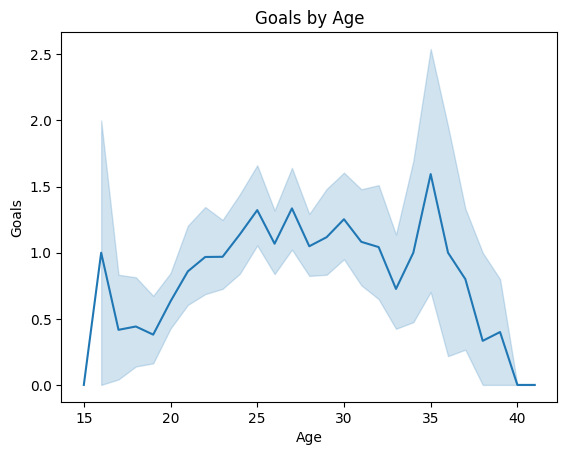

In [26]:
sns.lineplot(x= 'Age' , y= 'Goals' , data=df)
plt.title('Goals by Age')

plt.show()

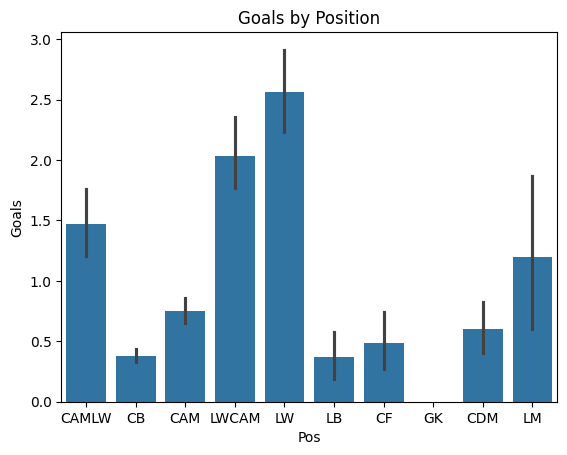

In [27]:
sns.barplot(x= 'Pos' , y= 'Goals' , data=df)
plt.title('Goals by Position')

plt.show()

<ipython-input-28-5d4020ab30eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data =df , x='Pos' , y='Goals' , inner= 'quartile' , palette='muted')


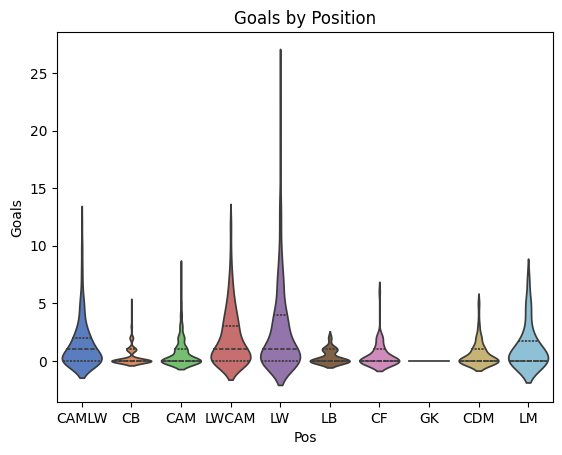

In [28]:
sns.violinplot(data =df , x='Pos' , y='Goals' , inner= 'quartile' , palette='muted')
plt.title('Goals by Position')

plt.show()

<Axes: xlabel='Min', ylabel='Goals'>

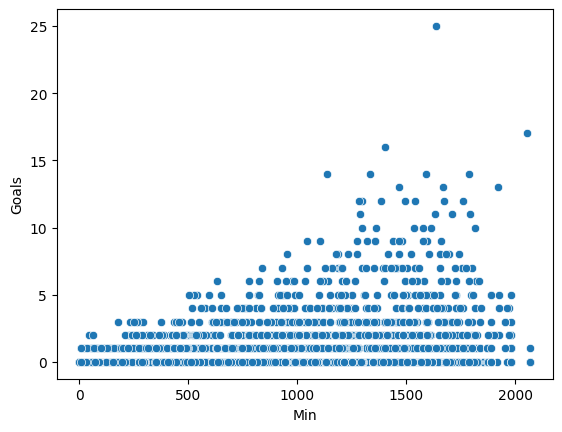

In [29]:
sns.scatterplot(x= 'Min' , y= 'Goals' , data=df)

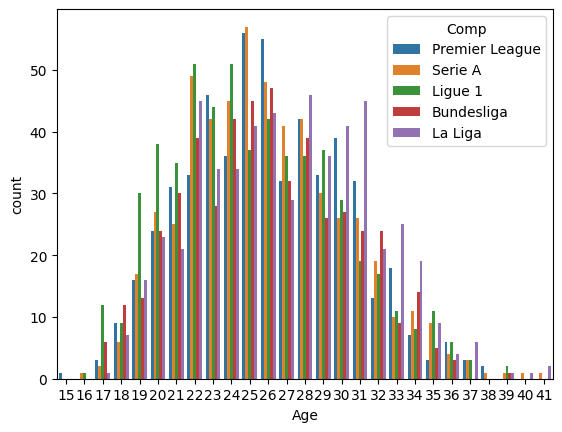

In [30]:
sns.countplot(x= 'Age' , data=df , hue='Comp' )

plt.show()

<Axes: xlabel='Age'>

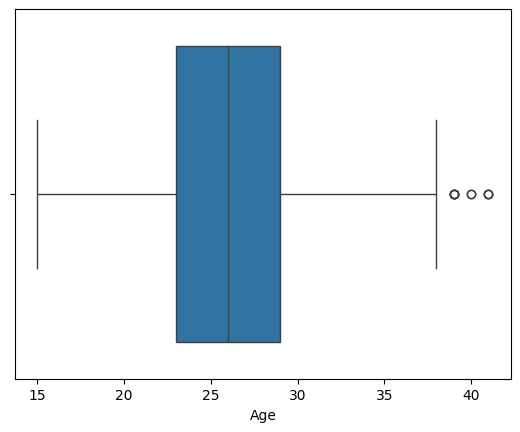

In [31]:
sns.boxplot(x = 'Age' , data = df)

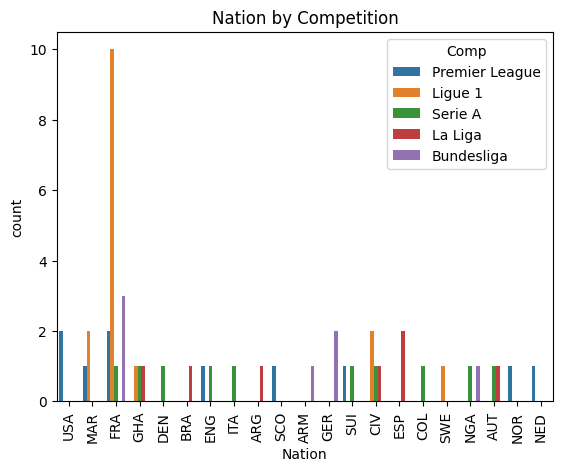

In [32]:
sns.countplot(x= 'Nation' , data=df.head(50) , hue = 'Comp')
plt.title('Nation by Competition')
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='Pos', ylabel='Goals'>

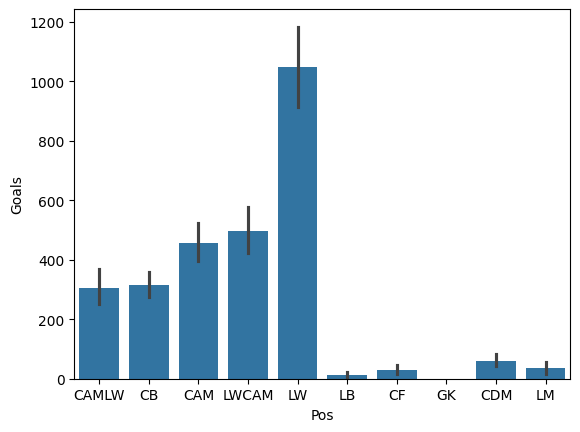

In [33]:
sns.barplot(x= 'Pos' , y= 'Goals' , data=df , estimator= sum)


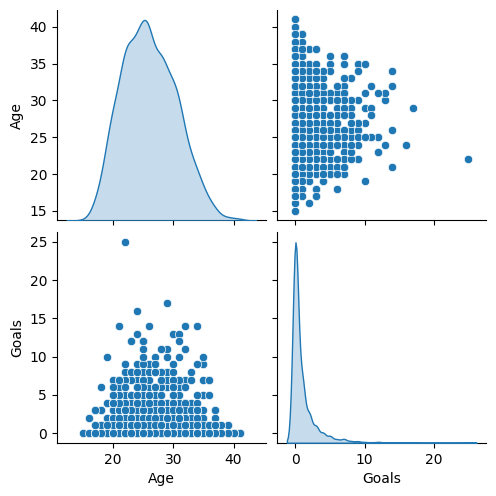

In [34]:
sns.pairplot(df[['Age' , 'Goals' , 'Comp']], kind='scatter' , diag_kind='kde')

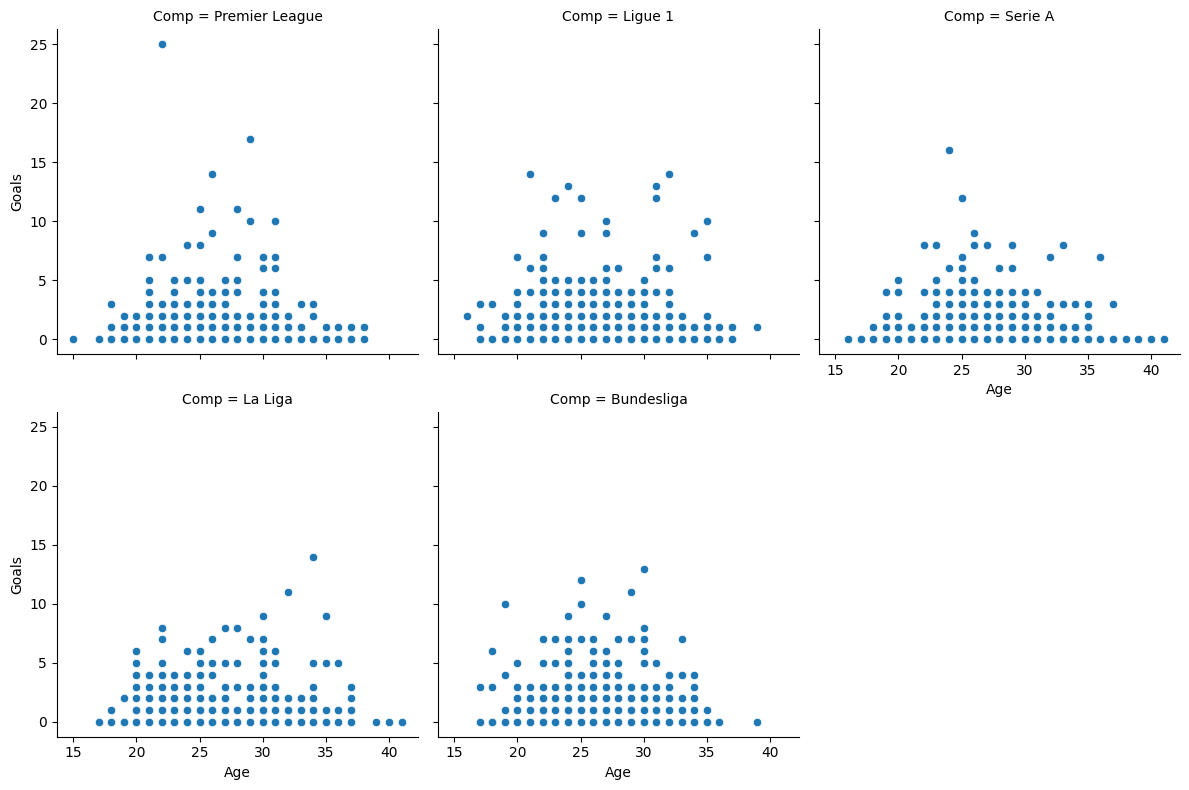

In [35]:
g = sns.FacetGrid(df, col='Comp' , col_wrap=3 , height=4 , aspect=1)
g.map(sns.scatterplot , 'Age' , 'Goals')

In [36]:
fig = px.sunburst(df, path=['Comp', 'Squad', 'Player'] , values='Goals')
fig.show()

In [39]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('Goals:Q', bin=alt.Bin(maxbins=60)),
    y='count(*):Q'
)

alt.Chart(...)